In [1]:
import matplotlib.pyplot as plt

# Example Dataset for images 
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
# show what the dataset contains: (data has the numerical data, images has the image)
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [3]:
# images are represented as 1 dimensional arrays (64 elements, 8x8):
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

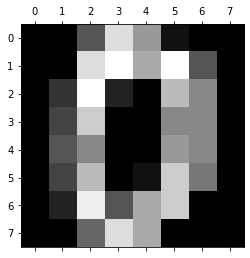

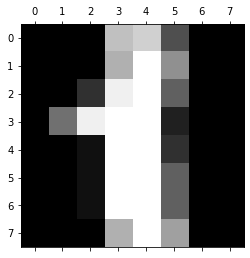

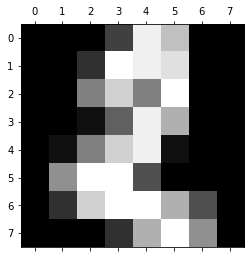

In [4]:
# show the first 3 images:
plt.gray()
for i in range(3):
    plt.matshow(digits.images[i])

In [5]:
# see what the 'target' field contains, print the first 5
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [6]:
#### we will use 'data' and 'target' to train our model
## 'data' contains the numerical image representation
## 'target' contains the correct value
## (the image is the actual image picture, dont need it to train, use numerical)

In [7]:
### split data:
from sklearn.model_selection import train_test_split
## X variable is already a 1 dimensional array so dont need double brackets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.8)

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train,y_train)

X:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
X:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
model.score(X_test, y_test)

0.9527777777777777

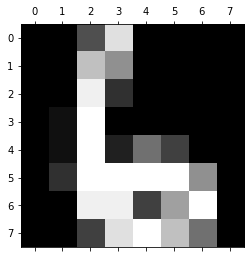

In [10]:
# pick a random image and see what the model predicts
plt.matshow(digits.images[67])

In [11]:
# need to supply a multidimensional array into predict function [[]]
model.predict([digits.data[67]])

array([6])

In [12]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [13]:
# check where your model is failing (see outliers)

y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix

# supply the truth versus prediction
cm = confusion_matrix(y_test, y_predicted)


Text(69.0, 0.5, 'Truth')

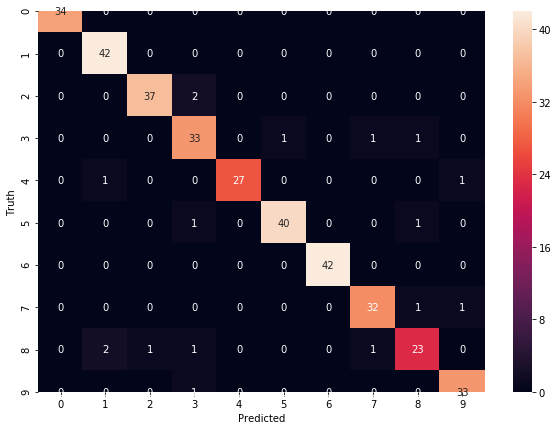

In [14]:
# visualize the confusion matrix ("cm") result, using seaborn's heatmap
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
# This heatmap shows how many times the truth deviated from your model, for each value
# The value on the tile is the # of times the event occured, and the axis shows the truth/prediction values